<a href="https://colab.research.google.com/github/woodwyyn/ML/blob/main/ML3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Деревья решений

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [5]:
from sklearn.datasets import make_blobs

Задча классификации

In [6]:
RANDOM_SEED = 0

X, y = make_blobs(
    n_samples=100,
    centers=[(0, 3), (3, 3), (3, 0)],
    n_features=2,
    random_state=RANDOM_SEED,
    cluster_std=(0.9, 0.9, 0.9) #расеивание точек для каждого кластера
)

Text(0, 0.5, 'X2')

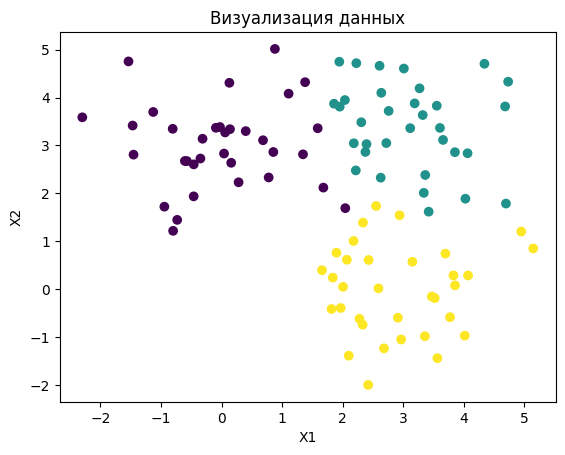

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Визуализация данных')
plt.xlabel('X1')
plt.ylabel('X2')

In [19]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [12]:
clf_tree = DecisionTreeClassifier(
    criterion='entropy', #критерий, функция для измерения качества разделения
    max_depth=4, #мак глубина дерева
    random_state=RANDOM_SEED
)
clf_tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

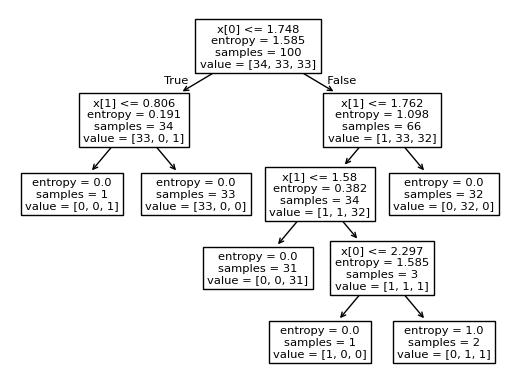

In [14]:
plot_tree(clf_tree)
plt.show()

Визуализируем границы принятия решений

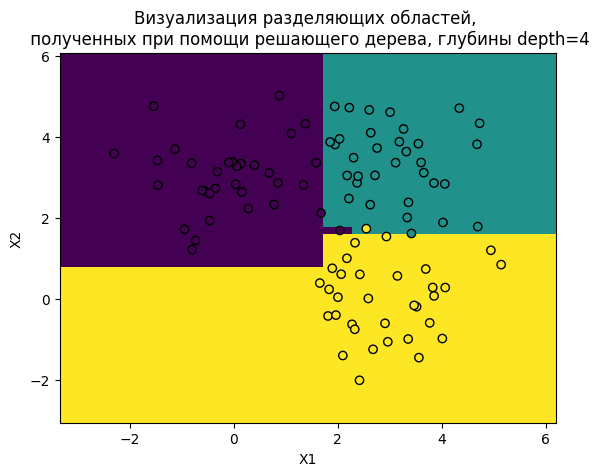

In [16]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_tree.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

plt.title('Визуализация разделяющих областей, \n полученных при помощи решающего дерева, глубины depth={}'.format(4))
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

Классивикация явная, точная. Ошибка видна одна на графике. Равномерное распередление

Оценка качества работы модели

In [20]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [22]:
y_pred = clf_tree.predict(X)

print(f"Матрица классификации:\n {confusion_matrix(y, y_pred)}")
print(f"Точность модели: {accuracy_score(y, y_pred)}")
print('F1_score =', f1_score(y, y_pred, average='micro'))

Матрица классификации:
 [[34  0  0]
 [ 0 33  0]
 [ 0  1 32]]
Точность модели: 0.99
F1_score = 0.99


Задача регрессии

In [38]:
n_samples = 100

#100 рандомных точек расположенных по порядку
X = np.sort(np.random.rand(n_samples))

#Функция + случайный шум
y = np.exp(X ** 2)+np.random.normal(0.0, 0.1, X.shape[0])

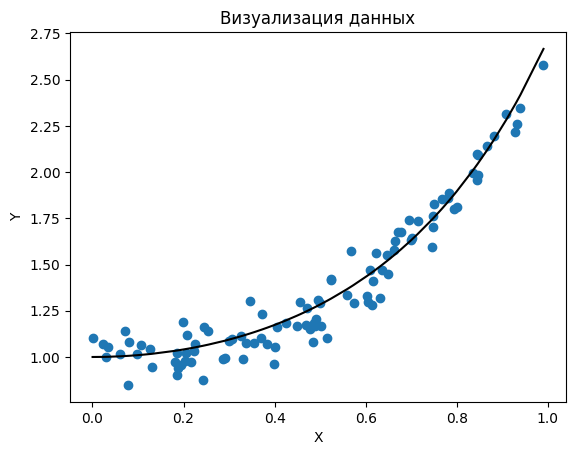

In [39]:
plt.scatter(X, y)
plt.plot(X, np.exp(X ** 2), c='k')

plt.title('Визуализация данных')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [31]:
from sklearn.tree import DecisionTreeRegressor

In [40]:
X = X.reshape((-1, 1))

reg_tree = DecisionTreeRegressor(max_depth=4, random_state=4)
reg_tree.fit(X, y)

DecisionTreeRegressor(max_depth=4, random_state=4)

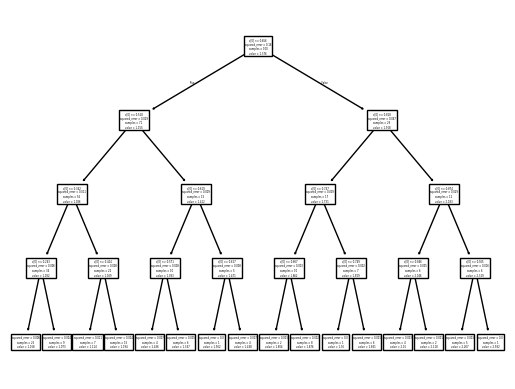

In [42]:
plot_tree(reg_tree)
plt.show()

График регрессии

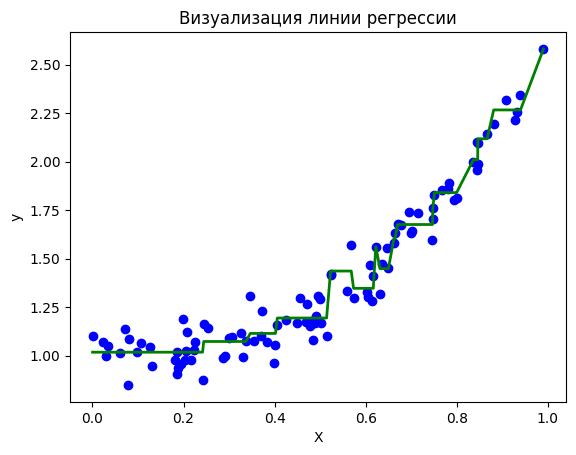

In [43]:
y_pred_reg =  reg_tree.predict(X)

plt.scatter(X, y, c="b")

plt.plot(X, y_pred_reg, "g", lw=2)

plt.title('Визуализация линии регрессии')
plt.xlabel('X')
plt.ylabel('y');

In [44]:
from sklearn.metrics import r2_score, mean_squared_error

In [46]:
print('Точность модели= ', r2_score(y, y_pred_reg))
print('Ошибка= ', mean_squared_error(y, y_pred_reg))

Точность модели=  0.96997935578726
Ошибка=  0.004793268614448586


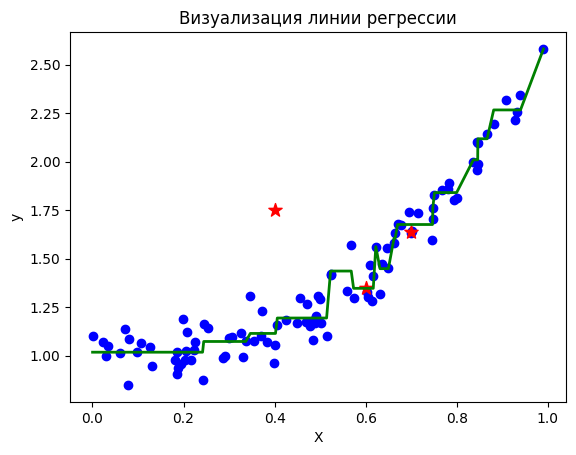

Для 0.7 предсказание 1.6761035260976371
Для 0.6 предсказание 1.3470340778372438
Для 0.4 предсказание 1.1144089574265543


In [79]:
observation = [[0.7, 1.64], [0.6, 1.35], [0.4, 1.75]]
result = []

plt.scatter(X, y, c="b")
plt.plot(X, y_pred_reg, "g", lw=2)

for obs in observation:
    plt.scatter(obs[0], obs[1], marker='*', s=100, color='red')
    pred = reg_tree.predict([[obs[0]]])
    result.append(pred)

plt.title('Визуализация линии регрессии')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

for i, obs in enumerate(observation):
    print(f"Для {obs[0]} предсказание {result[i][0]}")


Доп.задание

In [80]:
from sklearn.datasets import load_iris

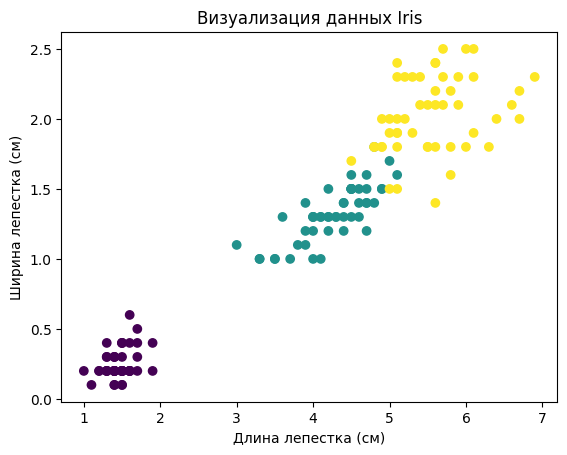

In [89]:
iris = load_iris()

X = iris.data[:, 2:]
y = iris.target

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Визуализация данных Iris')
plt.xlabel('Длина лепестка (см)')
plt.ylabel('Ширина лепестка (см)')
plt.show()

<ipython-input-123-9afd0359ac67>:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)


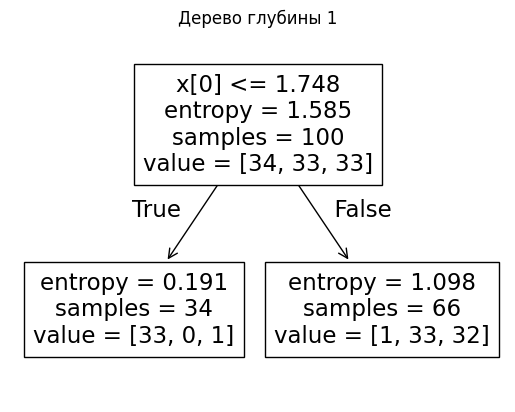

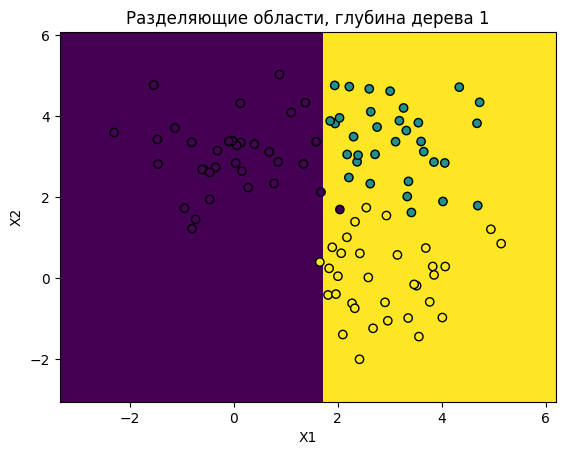

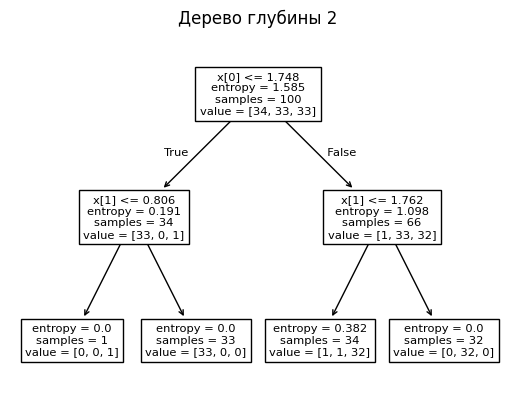

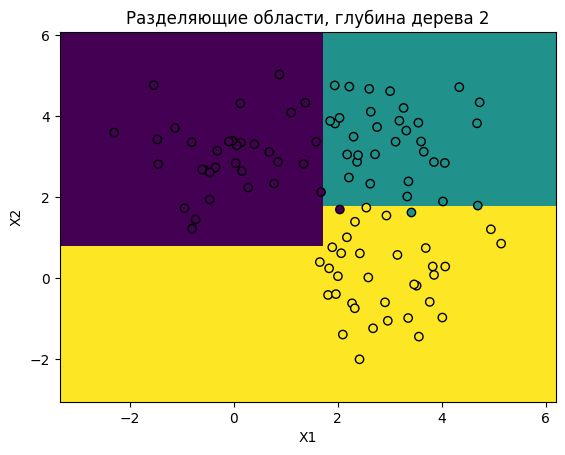

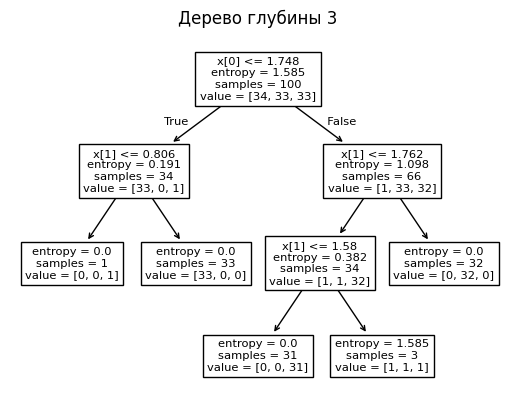

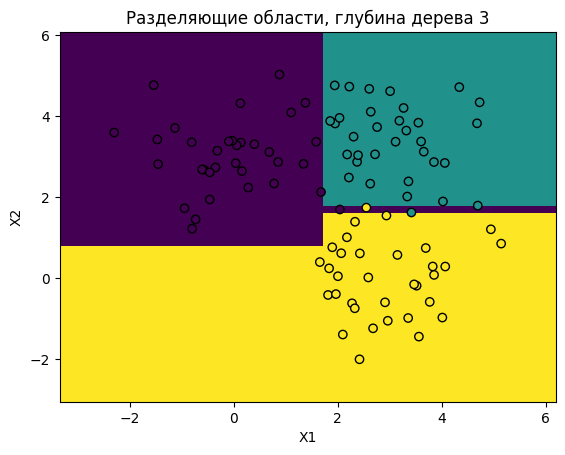

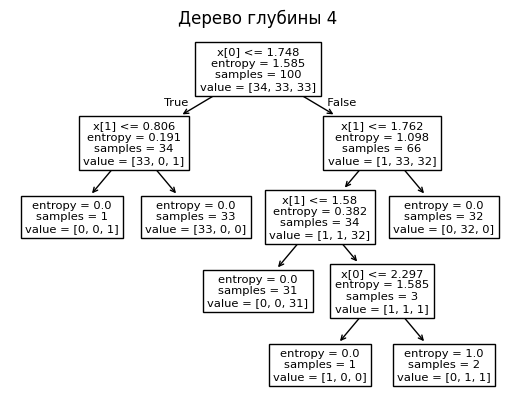

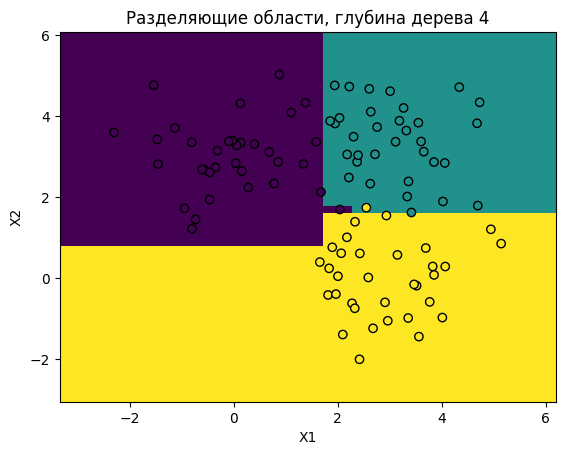

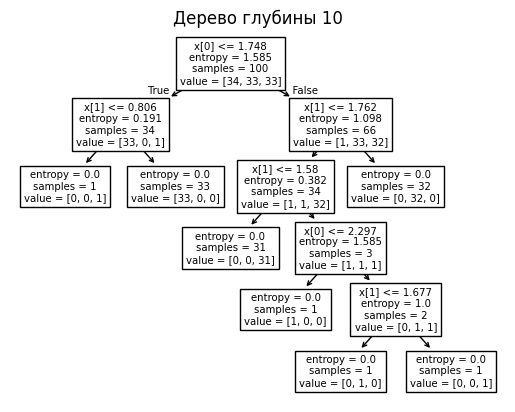

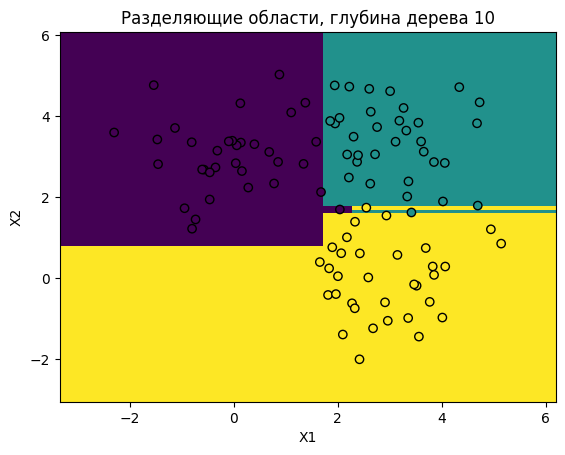

  Depth  Accuracy  F1 Score                      Confusion Matrix
0     1      0.66      0.66  [[33, 1, 0], [0, 33, 0], [1, 32, 0]]
1     2      0.98      0.98  [[33, 0, 1], [0, 32, 1], [0, 0, 33]]
2     3      0.98      0.98  [[34, 0, 0], [1, 32, 0], [1, 0, 32]]
3     4      0.99      0.99  [[34, 0, 0], [0, 33, 0], [0, 1, 32]]
4    10      1.00      1.00  [[34, 0, 0], [0, 33, 0], [0, 0, 33]]


In [123]:
from pprint import pprint

RANDOM_SEED = 0
X, y = make_blobs(
    n_samples=100,
    centers=[(0, 3), (3, 3), (3, 0)],
    n_features=2,
    random_state=RANDOM_SEED,
    cluster_std=(0.9, 0.9, 0.9)
)

depth = [1, 2, 3, 4, 10]
criterion = 'entropy'

metrics_df = pd.DataFrame(columns=["Depth", "Accuracy", "F1 Score", "Confusion Matrix"])

for dph in depth:
    clt = DecisionTreeClassifier(
        criterion=criterion,
        max_depth=dph,
        random_state=RANDOM_SEED
    )
    clt.fit(X, y)

    y_pred = clt.predict(X)

    accuracy = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred, average='micro')
    cm = confusion_matrix(y, y_pred)

    new_row = pd.DataFrame({
        "Depth": [dph],
        "Accuracy": [accuracy],
        "F1 Score": [f1],
        "Confusion Matrix": [cm]
    })

    metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)

    plot_tree(clt)
    plt.title(f"Дерево глубины {dph}")
    plt.show()

    X0 = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
    X1 = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100)
    X0_grid, X1_grid = np.meshgrid(X0, X1)

    y_predict = clt.predict(np.c_[X0_grid.ravel(), X1_grid.ravel()]).reshape(X0_grid.shape)

    plt.pcolormesh(X0_grid, X1_grid, y_predict)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black', linewidth=1)
    plt.title(f'Разделяющие области, глубина дерева {dph}')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

pprint(metrics_df)

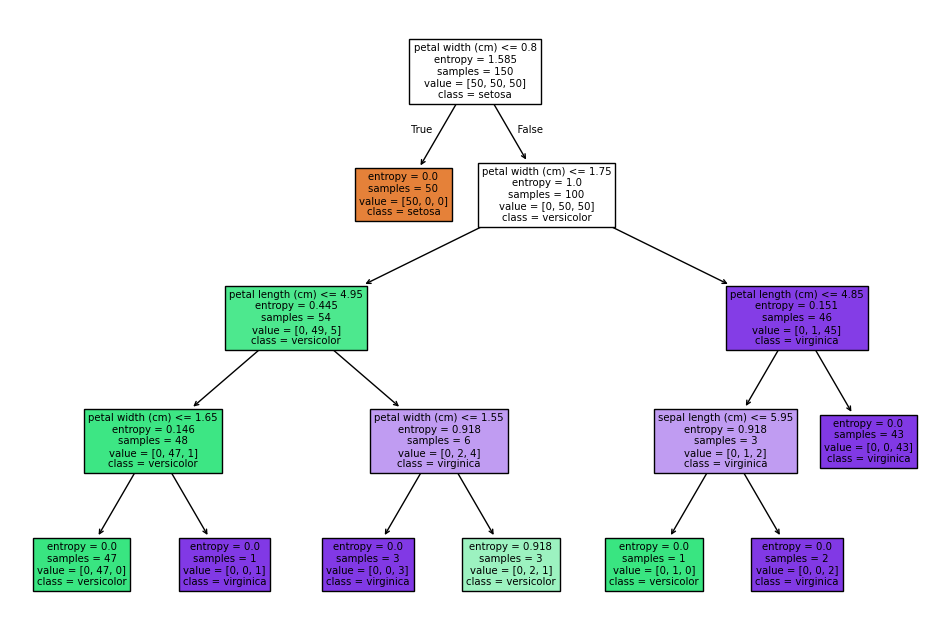

Confusion Matrix:
 [[50  0  0]
 [ 0 50  0]
 [ 0  1 49]]
Accuracy = 0.9933333333333333
F1 Score = 0.9933333333333333


In [122]:
iris = load_iris()

X = iris.data
y = iris.target

iris_tree = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=4,
    random_state=0
)
iris_tree.fit(X, y)

plt.figure(figsize=(12, 8))
plot_tree(iris_tree, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

y_pred = iris_tree.predict(X)

print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
print('Accuracy =', accuracy_score(y, y_pred))
print('F1 Score =', f1_score(y, y_pred, average='micro'))

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

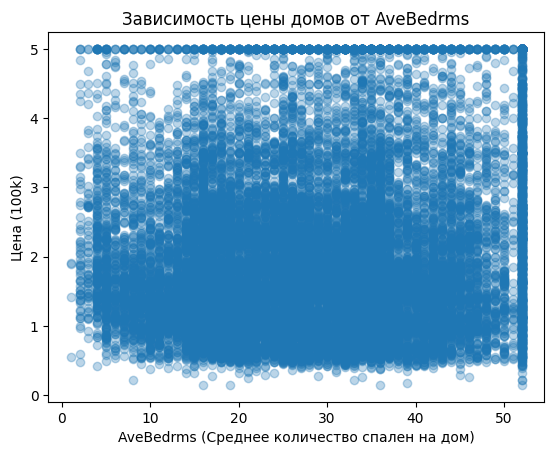

In [133]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
print(california)

X = california.data[:, [1]]
y = california.target

plt.scatter(X, y, alpha=0.3)
plt.title('Зависимость цены домов от AveBedrms')
plt.xlabel('AveBedrms (Среднее количество спален на дом)')
plt.ylabel('Цена (100k)')
plt.show()

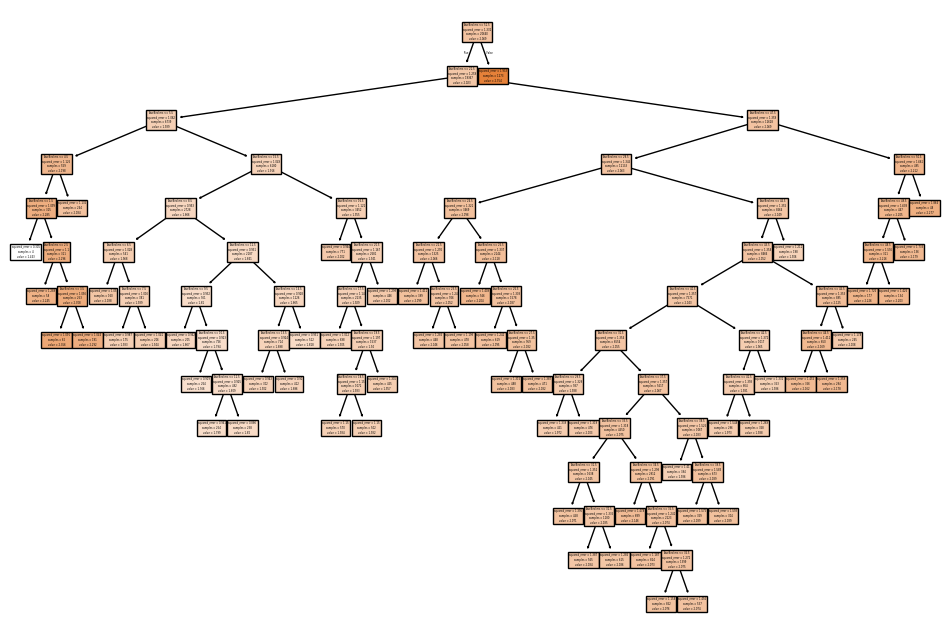

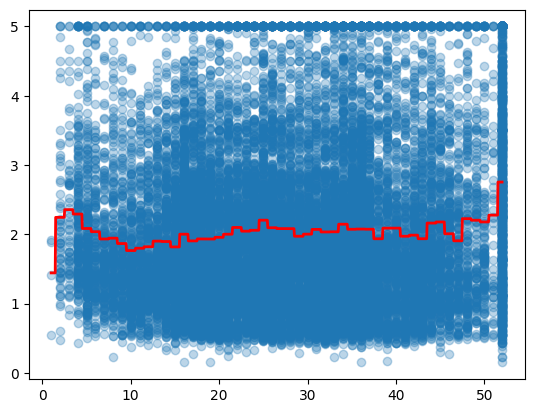

R2: 0.031, MSE: 1.290
Предсказание для 1.5 спален: 1.443


In [138]:
california_reg = DecisionTreeRegressor(random_state=0)
california_reg.fit(X, y)


plt.figure(figsize=(12, 8))
plot_tree(california_reg, feature_names=['AveBedrms'], filled=True)
plt.show()

x_test = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
y_pred = california_reg.predict(x_test)

plt.scatter(X, y, alpha=0.3)
plt.plot(x_test, y_pred, 'r', linewidth=2)
plt.show()

y_pred = california_reg.predict(X)
print(f"R2: {r2_score(y, y_pred):.3f}, MSE: {mean_squared_error(y, y_pred):.3f}")

new_obs = [[1.5]]
print(f"Предсказание для {new_obs[0][0]} спален: {california_reg.predict(new_obs)[0]:.3f}")

In [141]:
X = california.data
y = california.target

california_reg = DecisionTreeRegressor(random_state=0)
california_reg.fit(X, y_pred)

y_pred = california_reg.predict(X)
print(f"R2: {r2_score(y, y_pred):.3f}, MSE: {mean_squared_error(y, y_pred):.3f}")

R2: 0.031, MSE: 1.290
